# Time Series Transformation

In [14]:
from pandas import read_csv, Series
from matplotlib.pyplot import figure, xticks, show
from ts_functions import plot_series, HEIGHT

%run p00_settings.ipynb

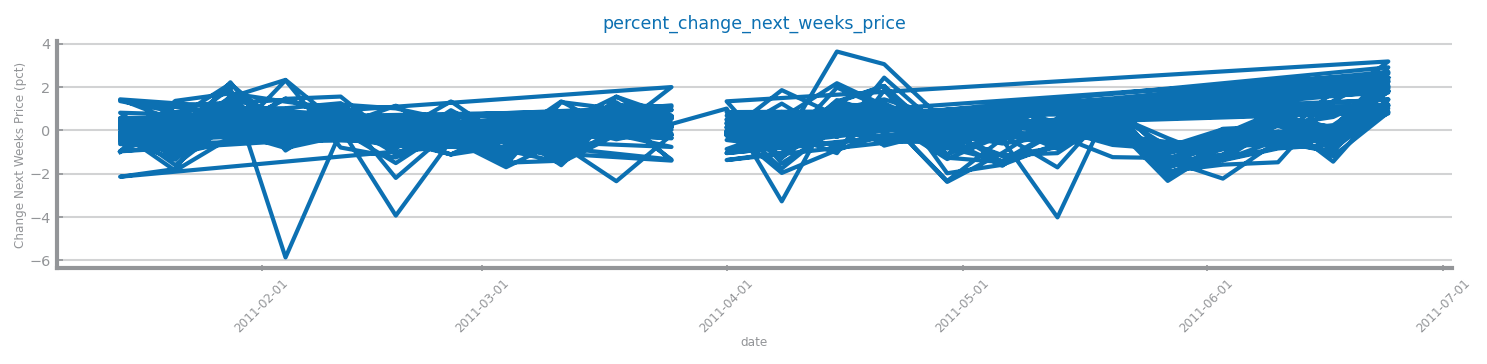

In [15]:
data = read_csv(project_path + prepared_out_data_file, index_col=time_var, sep=',', decimal='.', parse_dates=True, infer_datetime_format=True)

figure(figsize=(3*HEIGHT, HEIGHT/2))
plot_series(data[target], x_label=time_var, y_label='Change Next Weeks Price (pct)', title=target)
xticks(rotation = 45)
show()

# Smoothing

(array([734169., 734197., 734228., 734258., 734289., 734319.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

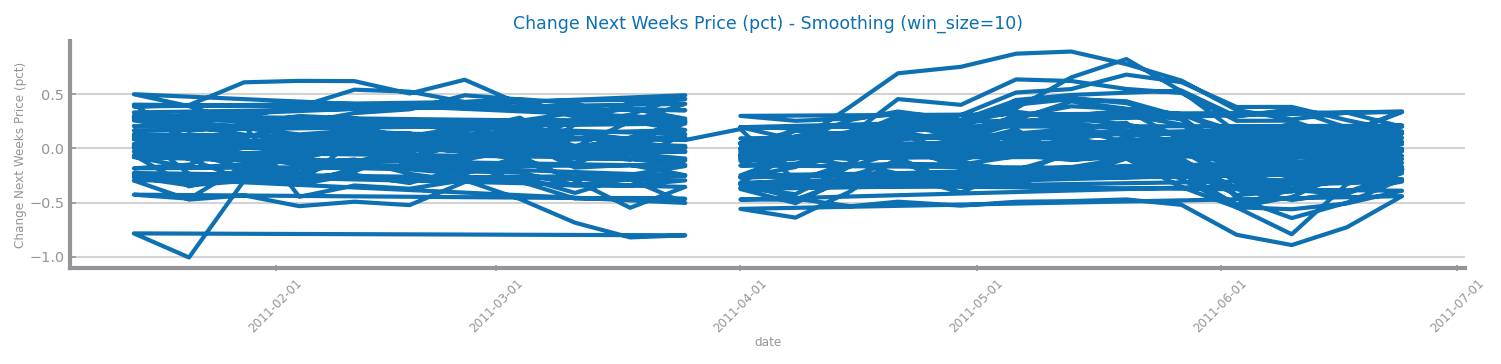

In [16]:
WIN_SIZE = 10
rolling_multi = data.rolling(window=WIN_SIZE)
smooth_df_10_multi = rolling_multi.mean()
figure(figsize=(3*HEIGHT, HEIGHT/2))
plot_series(smooth_df_10_multi[target], title=f'Change Next Weeks Price (pct) - Smoothing (win_size={WIN_SIZE})', x_label=time_var, y_label='Change Next Weeks Price (pct)')
xticks(rotation = 45)

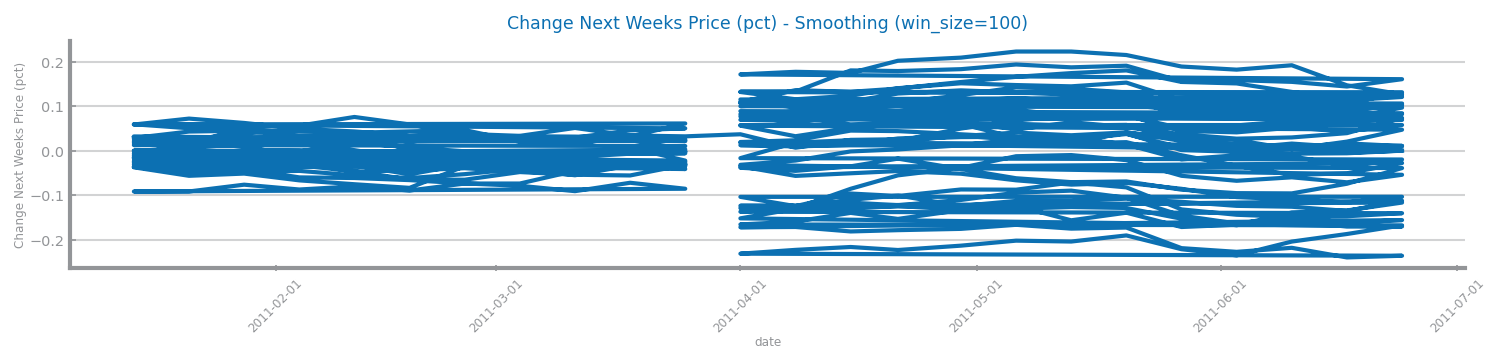

In [17]:
WIN_SIZE = 100
rolling_multi = data.rolling(window=WIN_SIZE)
smooth_df_100_multi = rolling_multi.mean()
figure(figsize=(3*HEIGHT, HEIGHT/2))
plot_series(smooth_df_100_multi[target], title=f'Change Next Weeks Price (pct) - Smoothing (win_size={WIN_SIZE})', x_label=time_var, y_label='Change Next Weeks Price (pct)')
xticks(rotation = 45)

show()

# Aggregation

In [18]:
def aggregate_by(data: Series, index_var: str, period: str):
    index = data.index.to_period(period)
    agg_df = data.copy().groupby(index).mean()
    agg_df[index_var] = index.drop_duplicates().to_timestamp()
    agg_df.set_index(index_var, drop=True, inplace=True)
    return agg_df

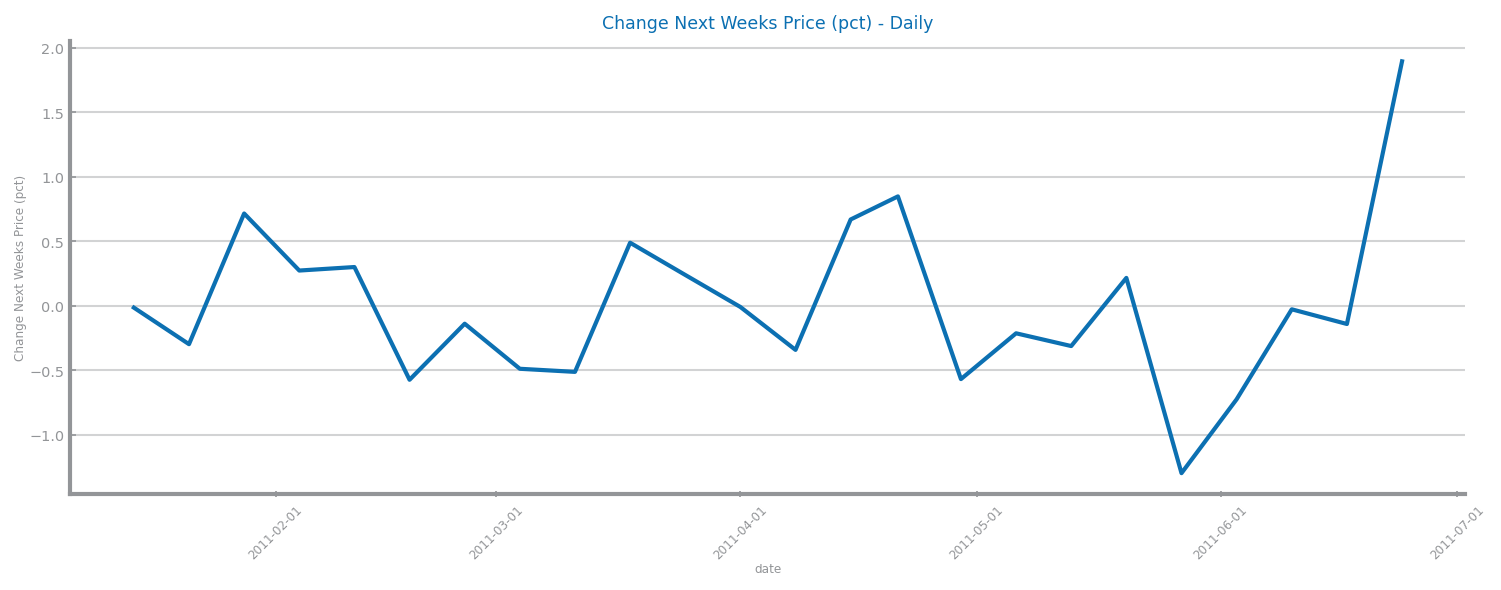

In [19]:
figure(figsize=(3*HEIGHT, HEIGHT))
agg_multi_D_df = aggregate_by(data, time_var, 'D')
plot_series(agg_multi_D_df[target], title='Change Next Weeks Price (pct) - Daily', x_label=time_var, y_label='Change Next Weeks Price (pct)')
xticks(rotation = 45)
show()

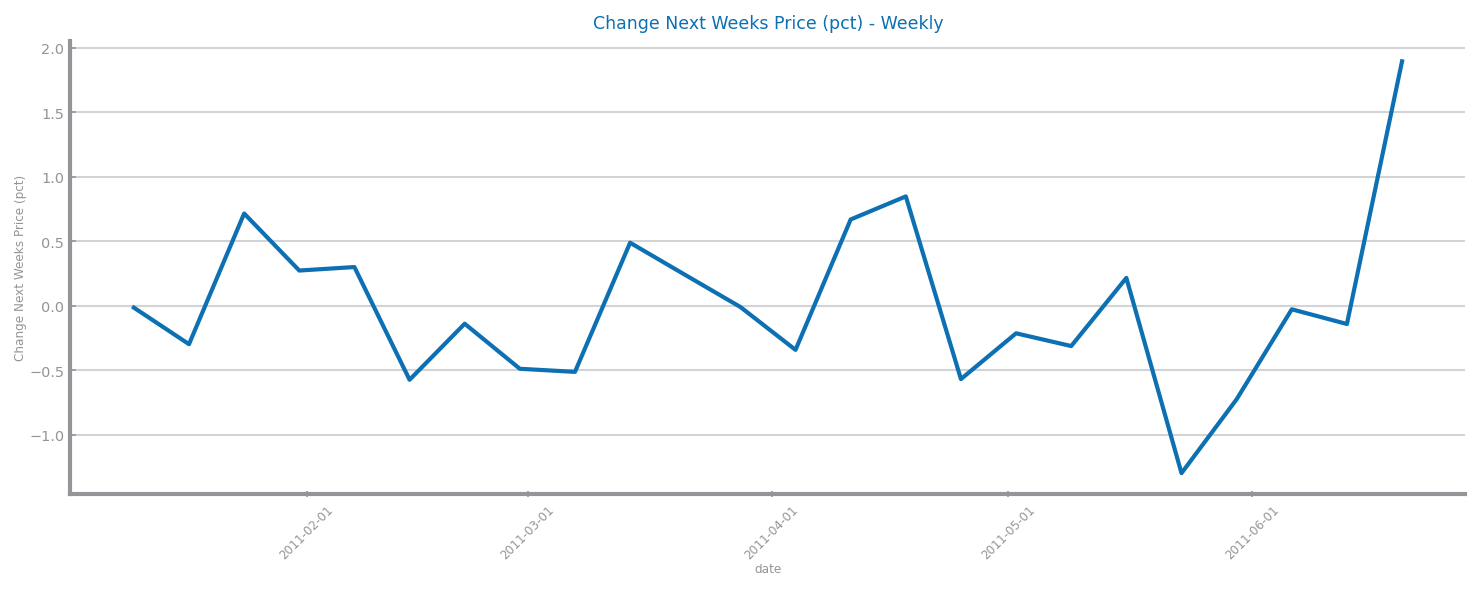

In [20]:
figure(figsize=(3*HEIGHT, HEIGHT))
agg_multi_W_df = aggregate_by(data, time_var, 'W')
plot_series(agg_multi_W_df[target], title='Change Next Weeks Price (pct) - Weekly', x_label=time_var, y_label='Change Next Weeks Price (pct)')
xticks(rotation = 45)
show()

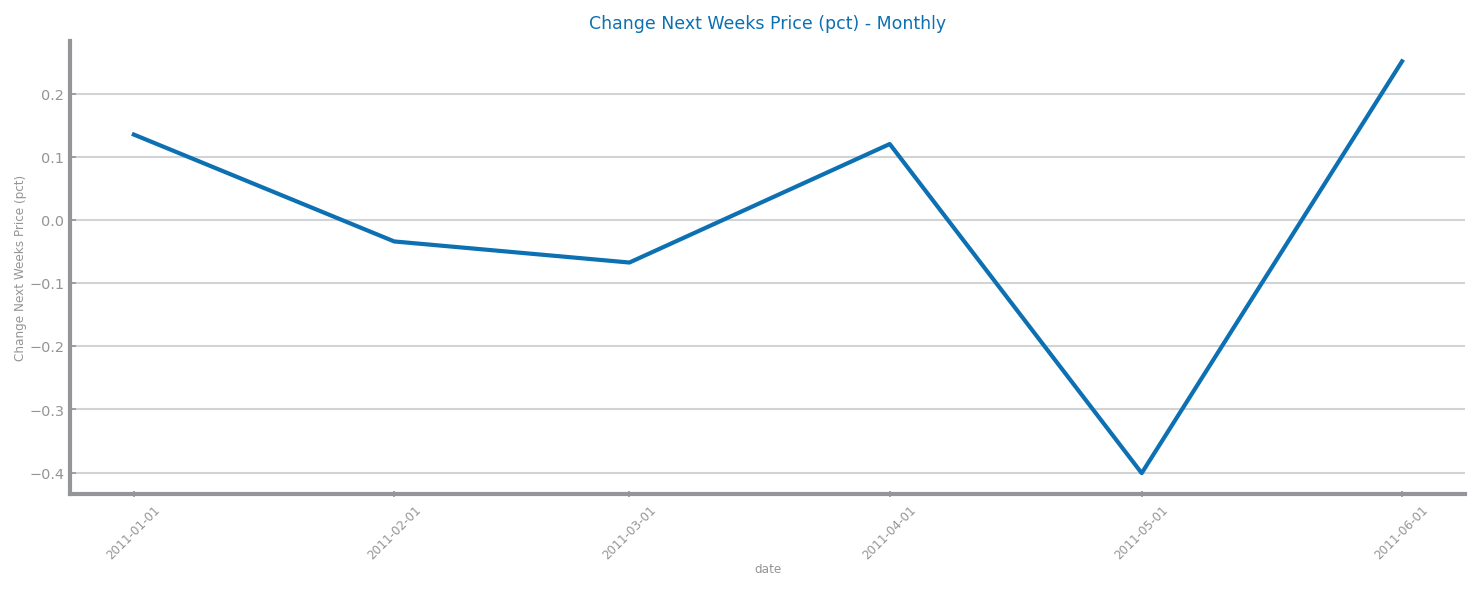

In [21]:
figure(figsize=(3*HEIGHT, HEIGHT))
agg_multi_M_df = aggregate_by(data, time_var, 'M')
plot_series(agg_multi_M_df[target], title='Change Next Weeks Price (pct) - Monthly', x_label=time_var, y_label='Change Next Weeks Price (pct)')
xticks(rotation = 45)
show()

# Differentiation

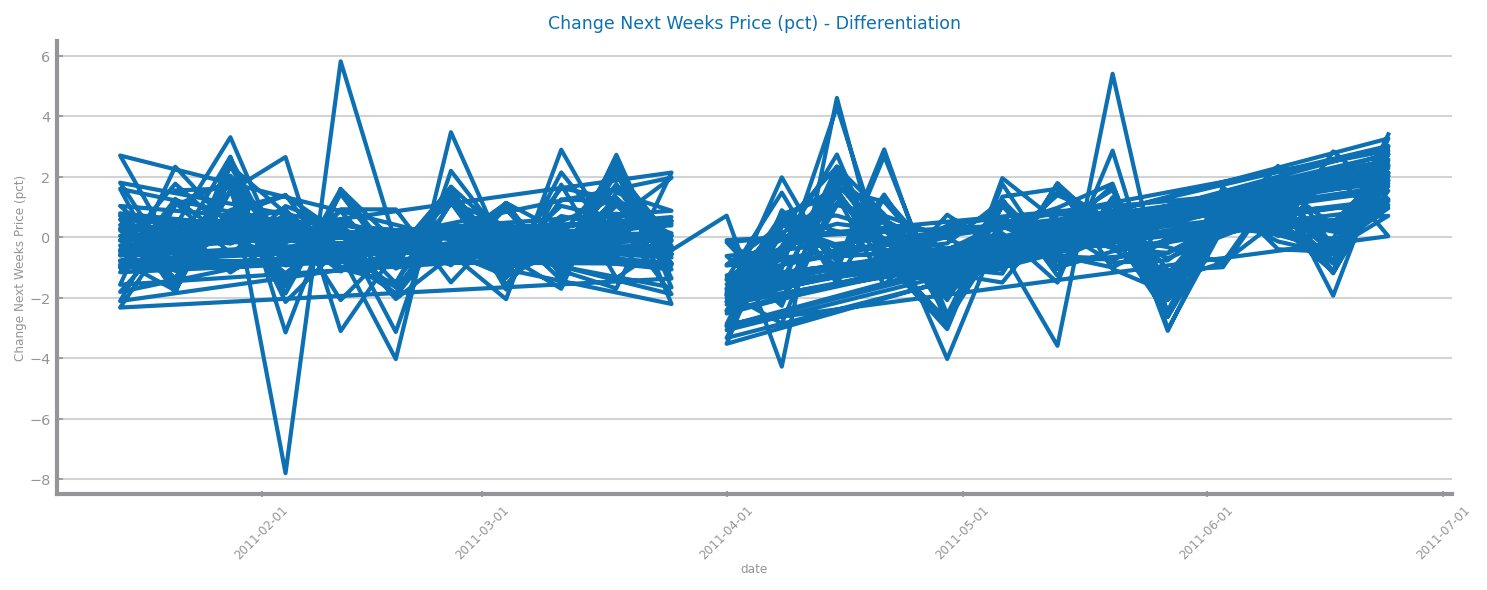

In [22]:
diff_df_multi = data.diff()
figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(diff_df_multi[target], title='Change Next Weeks Price (pct) - Differentiation', x_label=time_var, y_label='Change Next Weeks Price (pct)')
xticks(rotation = 45)
show()

# Export DataFrame to CSV:

In [23]:
exec('data_ts_transf =' + ts_transf_df)

data_ts_transf.to_csv(project_path + ts_transf_data_file, index=True)